In [1]:
# Evaluation of pursuit capture time function

import matplotlib.pyplot as plt
import math

def a_ij(d_ix,d_jx,m_i,m_j,m):
    return d_ix/(m_i*m_i-m*m) - d_jx/(m_j*m_j-m*m)

def b_ij(d_iy,d_jy,m_i,m_j,m):
    return d_iy/(m_i*m_i-m*m) - d_jy/(m_j*m_j-m*m)

def r_ij(d_ix,d_iy,d_jx,d_jy,m_i,m_j,m):
    return (math.sqrt(d_jx*d_jx+d_jy*d_jy)*m_j/(m_j*m_j-m*m) - math.sqrt(d_ix*d_ix+d_iy*d_iy)*m_i/(m_i*m_i-m*m))/m

def clamp_angle(x):
    pi2 = 2*math.pi
    return x - pi2*math.floor(x/pi2)

def sin_cos(a,b,r):
    c,t = math.acos(r/math.sqrt(a*a+b*b)), math.atan2(b,a)
    if c!=c:
        return nil
    return clamp_angle(t + c), clamp_angle(t - c)

def time_evaluate(dix,diy,mi,m,alpha):
    return ((dix*math.cos(alpha)+diy*math.sin(alpha))*m + math.sqrt(dix*dix+diy*diy)*mi)/(mi*mi-m*m)

In [2]:
print(time_evaluate(20,20,10,5,0))

5.10456949966


In [3]:
# Plot of pursuit capture time function

import matplotlib.pyplot as plt
import math

def plot(dix,diy,mi,m,da,label):
    a = 0
    alphas,times = [a],[time_evaluate(dix,diy,mi,m,a)]
    while a<2*math.pi:
        a += da
        t = time_evaluate(dix,diy,mi,m,a)
        #print(t)
        alphas.append(a)
        times.append(t)
    plt.plot(alphas,times,label=label)
    

In [1]:
#Plot many capture time functions together

plot(20,20,10,5,0.2,'0')
#plot(20,-20,10,5,0.2,'1')
#plot(-20,20,10,5,0.2,'2')
#plot(30,30,10,5,0.2,'3')
#plot(30,-30,10,5,0.2,'4')
#plot(-30,30,10,5,0.2,'5')

NameError: name 'plot' is not defined

In [5]:
import matplotlib.pyplot as plt
import math

# Here begins test of prediction-interception comparison

# Pursuit capture time function
def pred_time_evaluate(dix,diy,mi,m,alpha):
    return ((dix*math.cos(alpha)+diy*math.sin(alpha))*m + math.sqrt(dix*dix+diy*diy)*mi)/(mi*mi-m*m)

#Interception capture time function
def int_time_evaluate(dix,diy,mi,m,alpha):
    cos,sin = math.cos(alpha),math.sin(alpha)
    m2,mi2 = m*m,mi*mi
    return (math.sqrt(-m2*math.pow(-diy*cos+dix*sin,2)+mi2*(dix*dix+diy*diy))+m*(dix*cos+diy*sin))/(mi2-m2)

import matplotlib.pyplot as plt
import math

def plot(dix,diy,mi,m,da,label):
    a = 0
    f1,f2 = pred_time_evaluate,int_time_evaluate
    alphas,times_pd,times_it = [a],[f1(dix,diy,mi,m,a)],[f2(dix,diy,mi,m,a)]
    while a<2*math.pi:
        a += da
        t = f1(dix,diy,mi,m,a)
        #print(t)
        alphas.append(a)
        times_pd.append(t)
        t = f2(dix,diy,mi,m,a)
        times_it.append(t)
    plt.plot(alphas,times_pd,label=label+'_pred')
    plt.plot(alphas,times_it,label=label+'_int')

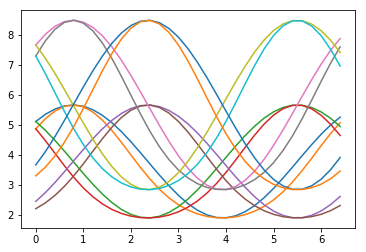

In [6]:
#plot both interception and pursuit capture time functions

plot(20,20,10,5,0.2,'0')
plot(20,-20,10,5,0.2,'1')
plot(-20,20,10,5,0.2,'2')
plot(30,30,10,5,0.2,'3')
plot(30,-30,10,5,0.2,'4')
plot(-30,30,10,5,0.2,'5')

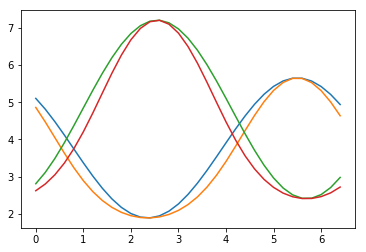

In [7]:
#plot(20,20,10,5,0.2,'0')
plot(20,-20,10,5,0.2,'1')
#plot(-20,20,10,5,0.2,'2')
#plot(30,30,10,5,0.2,'3')
#plot(30,-30,10,5,0.2,'4')
plot(-30,20,10,5,0.2,'5')